# Multiclass


## Import TensorFlow and other libraries

In [10]:
import tensorflow as tf
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

from pandas import get_dummies

In [11]:
#read the data 

In [12]:
dataframe = pd.read_csv('iris.csv')
dataframe.head()

,petallength,petalwidth,sepallength,sepalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


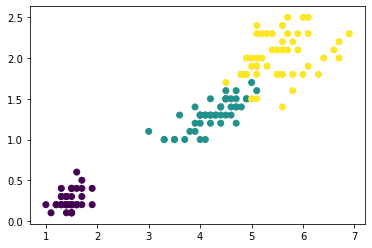

In [13]:
plt.scatter(dataframe.sepallength,dataframe.sepalwidth,c=dataframe.species)

In [14]:
#prepare the data

In [15]:
x=dataframe.drop(labels='species', axis=1)
y_label=dataframe.iloc[:, 4]

In [16]:
x=x.values

In [17]:
y_hot = get_dummies(y_label)

In [18]:
y=y_hot.values

In [19]:
x=tf.Variable(x)
x=tf.cast(x,tf.float32)

In [20]:
#perceptron training 

In [21]:
#defining the parameters

In [22]:
Number_of_features=4
Number_of_units=3  

In [23]:
# weights and bias
weight=tf.Variable(tf.zeros([Number_of_features,Number_of_units]))  
bias=tf.Variable(tf.zeros([Number_of_units]))

In [25]:
#perceptron definition
def perceptron(x):
    I=tf.add(tf.matmul(x,weight),bias)
    output=tf.nn.softmax(I)
    return output

In [24]:
#optimizer
optimizer=tf.optimizers.Adam(.01)

In [26]:
#training definition
def train(i):
    for n in range(i):
        loss=lambda: abs(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=perceptron(x))))
        optimizer.minimize(loss,[weight,bias])

In [27]:
#Train the perceptron
train(1000)

In [35]:
tf.print(weight)

[[0.684310317 0.895632207 -1.01323485]
 [2.64246511 -1.134377 -3.20665288]
 [-2.96634173 -0.12937668 3.25728464]
 [-2.97383857 -3.13501763 3.23136497]]


In [29]:
ypred=perceptron(x)

In [30]:
ypred=tf.round(ypred)

In [31]:
ypred

<tf.Tensor: id=98108, shape=(150, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 

In [32]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [33]:
accuracy_score(y, ypred)

0.98

In [34]:
###The End